In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

from os import listdir
from scipy.spatial.distance import pdist, squareform

rcParams = {'font.size': 24 , 'font.weight': 'bold', 'font.family': 'sans-serif',
            'axes.unicode_minus':False, 'axes.labelweight':'normal', 'lines.linewidth':3}


In [6]:
data_dir = '/Users/harihara/Mount-2/Synechococcus_paper_analysis/Ref_Guided_Scaffolding_Clustering_Aug_2022/\
Read_Alignments_to_Novel_Contigs_75_5_75_500/Summarized_Coverages/'
files = listdir(data_dir)
df_Summary = pd.DataFrame()
for f in files:
    if f.startswith("Hot"):
        df = pd.read_csv(data_dir+f, sep = "\t")
        print(df)
        del df['Unnamed: 0']
        df_Summary = df_Summary.append(df, ignore_index = True)
        
df_breadth = df_Summary.pivot_table(index = 'Sample', columns = 'Subject',values = 'Breadth_Coverage')
df_breadth = df_breadth.fillna(0).reset_index()
df_breadth['Sample'] = df_breadth['Sample'].str.replace("_FD.paf","")
df_breadth = df_breadth.set_index('Sample')

df_depth = df_Summary.pivot_table(index = 'Sample', columns = 'Subject',values = 'Avg_Depth_Coverage')
df_depth = df_depth.fillna(0).reset_index()

df_reads = df_Summary.pivot_table(index = 'Sample', columns = 'Subject',values = 'Num_Reads')
df_reads = df_reads.fillna(0).reset_index()

     Unnamed: 0                          Subject  Breadth_Coverage  \
0             0  Hotspr20SampleP4_osa_k141_10006             99.29   
1             1  Hotspr20SampleP4_osa_k141_11423             97.14   
2             2   Hotspr20SampleP4_osa_k141_1211             99.72   
3             3  Hotspr20SampleP4_osa_k141_13222             98.19   
4             4  Hotspr20SampleP4_osa_k141_13367             85.36   
..          ...                              ...               ...   
467         467   HotsprottomLayer_osb_k141_2120             15.77   
468         468   HotsprottomLayer_osb_k141_3970              9.58   
469         469   HotsprottomLayer_osb_k141_6546             18.43   
470         470   HotsprottomLayer_osb_k141_7765             39.08   
471         471   HotsprottomLayer_osb_k141_8855             76.08   

     Avg_Depth_Coverage  Num_Reads                   Sample Ref  
0                 38.51        186  HotsprSampOS1265_FD.paf  FD  
1                129.90    

     Unnamed: 0                          Subject  Breadth_Coverage  \
0             0  Hotspr20SampleP4_osa_k141_10006             98.58   
1             1  Hotspr20SampleP4_osa_k141_11423             98.65   
2             2   Hotspr20SampleP4_osa_k141_1211             99.55   
3             3  Hotspr20SampleP4_osa_k141_13222             98.19   
4             4  Hotspr20SampleP4_osa_k141_13367             75.19   
..          ...                              ...               ...   
676         676   HotsprottomLayer_osb_k141_6546             95.00   
677         677   HotsprottomLayer_osb_k141_7765             97.71   
678         678   HotsprottomLayer_osb_k141_8557             72.21   
679         679   HotsprottomLayer_osb_k141_8855             95.69   
680         680   HotsprottomLayer_osb_k141_8930             77.31   

     Avg_Depth_Coverage  Num_Reads                   Sample Ref  
0                 97.65        471  Hotspr2SamplePe2_FD.paf  FD  
1                 77.95    

     Unnamed: 0                          Subject  Breadth_Coverage  \
0             0  Hotspr20SampleP4_osa_k141_10006             99.29   
1             1  Hotspr20SampleP4_osa_k141_11423             97.74   
2             2   Hotspr20SampleP4_osa_k141_1211             98.94   
3             3  Hotspr20SampleP4_osa_k141_13222             98.19   
4             4  Hotspr20SampleP4_osa_k141_13367             77.05   
..          ...                              ...               ...   
680         680   HotsprottomLayer_osb_k141_6546             95.00   
681         681   HotsprottomLayer_osb_k141_7765             97.14   
682         682   HotsprottomLayer_osb_k141_8557             94.09   
683         683   HotsprottomLayer_osb_k141_8855             97.13   
684         684   HotsprottomLayer_osb_k141_8930             77.31   

     Avg_Depth_Coverage  Num_Reads                   Sample Ref  
0                 35.11        169  HotsprSampleMSe1_FD.paf  FD  
1                 31.07    

     Unnamed: 0                          Subject  Breadth_Coverage  \
0             0  Hotspr20SampleP4_osa_k141_10006             99.29   
1             1  Hotspr20SampleP4_osa_k141_11423             98.65   
2             2   Hotspr20SampleP4_osa_k141_1211             99.80   
3             3  Hotspr20SampleP4_osa_k141_13222             98.19   
4             4  Hotspr20SampleP4_osa_k141_13367             91.94   
..          ...                              ...               ...   
679         679   HotsprottomLayer_osb_k141_6546             95.00   
680         680   HotsprottomLayer_osb_k141_7765             96.85   
681         681   HotsprottomLayer_osb_k141_8557             72.21   
682         682   HotsprottomLayer_osb_k141_8855             90.67   
683         683   HotsprottomLayer_osb_k141_8930             74.37   

     Avg_Depth_Coverage  Num_Reads                   Sample Ref  
0                307.41       1481  Hotspr20SampleP4_FD.paf  FD  
1                271.69    

     Unnamed: 0                          Subject  Breadth_Coverage  \
0             0  Hotspr20SampleP4_osa_k141_10006             98.43   
1             1  Hotspr20SampleP4_osa_k141_11423             96.69   
2             2   Hotspr20SampleP4_osa_k141_1211             99.72   
3             3  Hotspr20SampleP4_osa_k141_13222             95.49   
4             4  Hotspr20SampleP4_osa_k141_13367             87.97   
..          ...                              ...               ...   
666         666   HotsprottomLayer_osb_k141_6546             92.96   
667         667   HotsprottomLayer_osb_k141_7765             94.56   
668         668   HotsprottomLayer_osb_k141_8557             86.44   
669         669   HotsprottomLayer_osb_k141_8855             82.30   
670         670   HotsprottomLayer_osb_k141_8930             65.41   

     Avg_Depth_Coverage  Num_Reads                   Sample Ref  
0                 10.15         49  HotsprSampleOSM2_FD.paf  FD  
1                 46.53    

     Unnamed: 0                           Subject  Breadth_Coverage  \
0             0   Hotspr20SampleP4_osa_k141_10006             99.29   
1             1   Hotspr20SampleP4_osa_k141_11423             97.14   
2             2    Hotspr20SampleP4_osa_k141_1211             99.80   
3             3   Hotspr20SampleP4_osa_k141_13222             98.19   
4             4   Hotspr20SampleP4_osa_k141_13367             96.03   
..          ...                               ...               ...   
351         351  HotsprottomLayer_2_osb_k141_7309             96.96   
352         352   HotsprottomLayer_osb_k141_12376             29.03   
353         353    HotsprottomLayer_osb_k141_2120             15.99   
354         354    HotsprottomLayer_osb_k141_7765             10.59   
355         355    HotsprottomLayer_osb_k141_8855             80.86   

     Avg_Depth_Coverage  Num_Reads                   Sample Ref  
0                 72.30        349  HotsprSampleOS55_FD.paf  FD  
1              

     Unnamed: 0                          Subject  Breadth_Coverage  \
0             0  Hotspr20SampleP4_osa_k141_10006             98.58   
1             1  Hotspr20SampleP4_osa_k141_11423             96.69   
2             2   Hotspr20SampleP4_osa_k141_1211             97.23   
3             3  Hotspr20SampleP4_osa_k141_13222             89.35   
4             4  Hotspr20SampleP4_osa_k141_13367             97.39   
..          ...                              ...               ...   
682         682   HotsprottomLayer_osb_k141_6546             95.00   
683         683   HotsprottomLayer_osb_k141_7765             97.71   
684         684   HotsprottomLayer_osb_k141_8557             94.36   
685         685   HotsprottomLayer_osb_k141_8855             97.13   
686         686   HotsprottomLayer_osb_k141_8930             92.72   

     Avg_Depth_Coverage  Num_Reads                   Sample Ref  
0                 25.85        125  HotsprSamplt10cd_FD.paf  FD  
1                 30.41    

/Users/harihara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [7]:
FM = df_breadth.values#df.filter(regex = "Group_*").values
FM[FM < 95] = 0
FM[FM >= 95] = 1

df_Metadata = pd.read_csv('/Users/harihara/Research-Activities/Data/Hot-Spring/hotspring_metadata.csv', 
                          sep = ",", index_col = 'SampleID')
sample_spring = dict(zip(df_Metadata.index.tolist(), df_Metadata.Spring_Name.tolist()))
Dist_Mat = squareform(pdist(FM, metric = "hamming"))

/Users/harihara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  import sys


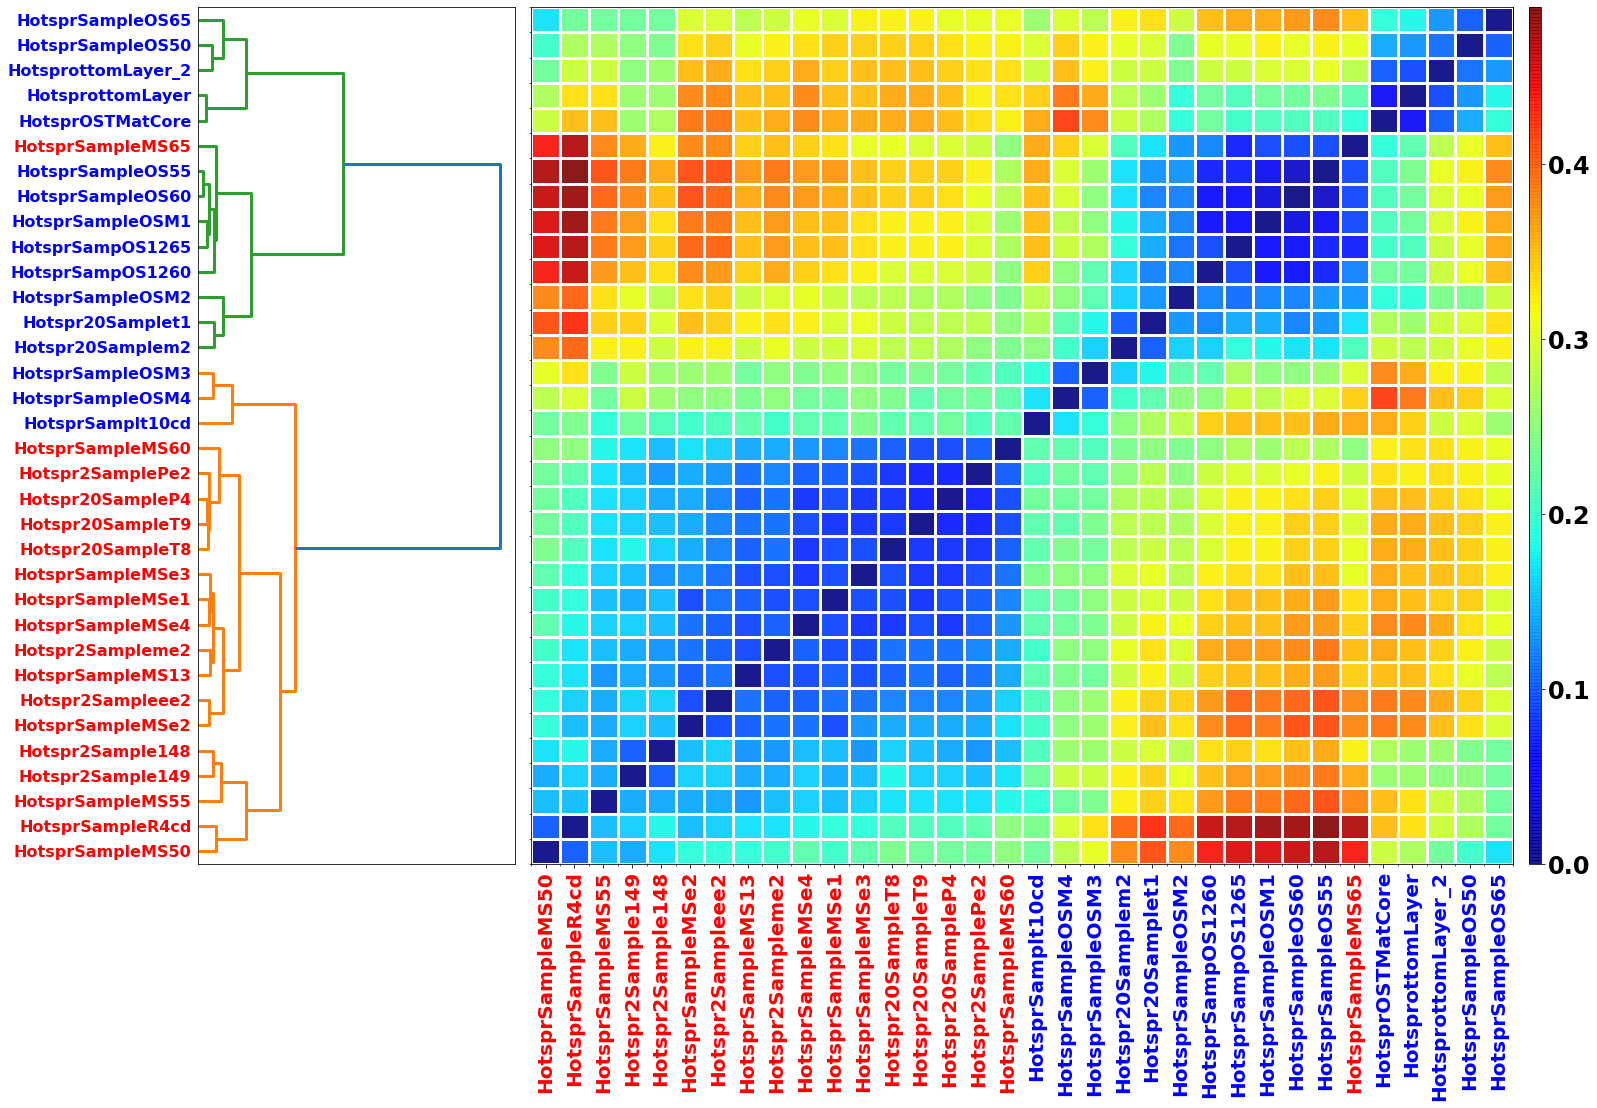

In [10]:
plt.rcParams.update(rcParams)

MAT = Dist_Mat

fig = plt.figure(figsize=(22,17))
axdendro = fig.add_axes([0.1,0.25,0.2,0.7])
Y = sch.linkage(MAT, method='ward',optimal_ordering=True)
Z = sch.dendrogram(Y, orientation='right', color_threshold = 0.8*max(Y[:,2]))
index = Z['leaves']
ticks = np.array(df_breadth.index.tolist())
axdendro.set_xticks([])
axdendro.set_yticklabels(ticks[index], size = 16)
a = [axdendro.get_yticklabels()[i].set_color('red')  
     if (sample_spring[ticks[index][i]] == 'Mushroom' ) 
     else axdendro.get_yticklabels()[i].set_color('blue') 
     for i in range(len(axdendro.get_yticklabels()))]

axmatrix = fig.add_axes([0.31,0.25,0.62,0.7])

MAT = MAT[index,:]
MAT = MAT[:,index]
MAT = np.round(MAT, 2)
#MAT[MAT == 0] = np.inf
im = axmatrix.imshow(MAT, aspect='auto', origin='lower', interpolation = 'none', cmap = 'jet', alpha = 0.9)
axmatrix.set_xticks(list(range(0, len(ticks))))
axmatrix.set_xticklabels(ticks[index], rotation = 90, size = 20)
axmatrix.xaxis.set_ticks_position('bottom')
ng = len(ticks)
axmatrix.set_xticks(np.arange(-.5, 34, 1), minor=True)
axmatrix.set_yticks(np.arange(-.5, 34, 1), minor=True)
a = [axmatrix.get_xticklabels()[i].set_color('red')  
     if (sample_spring[ticks[index][i]] == 'Mushroom' ) 
     else axmatrix.get_xticklabels()[i].set_color('blue') 
     for i in range(len(axmatrix.get_xticklabels()))]

# Gridlines based on minor ticks
axmatrix.grid(which='minor', color='white', linestyle='-', linewidth=3)

axmatrix.set_yticks([])

axcolor = fig.add_axes([0.94,0.25,0.0075,0.7])
plt.colorbar(im, cax=axcolor)

fig.subplots_adjust(bottom = 0.001, left = 0.01)
fig.savefig('/Users/harihara/Research-Activities/Plots/Hot_Spring_Plots/Synechococcus-Paper/\
Cluster_Novel_Contigs(Reads).pdf')